# 텍스트 마이닝 (Text Mining Introduction)
## 주요 용어
- 말뭉치(Corpus): A set of documents
- 토큰(Token): Meaningful elements in a text such as words or phrases or symbols
 - 자연어 분석을 위해 긴 문자열을 작은 단위로 나눔 -> 이 단위를 토큰
 - tokenizer로 작은 단위로 나누는 것이 가능
- 형태소(Morphemes) 분석: Smallest meaningful unit in a language
 - 보통 NLP에서 토큰으로 형태소하며, 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하는 작업
 - 어간 추출(stemming)
 - 원형 복원(lemmatizing)
 - 품사 부착(Part-Of-Speech tagging)
   - NN 명사(단수형 혹은 집합형)
   - PRP 인칭대명사
   - VBP 동사 현재형
   - ...
- 예측/분류 모델
 - 감성분석
 - 이탈예측
- Toipic Modeling
- Word2Vec

## 참고 블로그
- https://ratsgo.github.io/natural%20language%20processing/2017/03/22/lexicon/
- https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
- https://datascienceschool.net/view-notebook/70ce46db4ced4a999c6ec349df0f4eb0/


## 전처리 with Scikit-learn
- BOW (Bag of Words)
 - Tokenize: 단어(토큰)으로 분리
 - 어휘 사전 구축: 모든 단어를 모으고 번호 부여(알파벳 순서)
 - 인코딩: 단어별 카운트

- CountVectorizer
 - stop_words: 'english'
 - analyzer: 'word', 'character' ..
 - tokenizer: `any function`
 - ngram_range
 - min_df
 - max_df

- TfidfVectorizer
 - wikipedia: https://ko.wikipedia.org/wiki/Tf-idf)
 - TF-IDF(Term Frequency – Inverse Document Frequency) 
 - 특정 단어의 빈도수와 특정 단어가 포함된 문서수의 반비례수를 곱하여 표현
 - 단어가 여러 문서에 포함되면 가중치를 적게 반영
- DictVectorizer
- HashingVectorizer

## KoNLPy
- 한국어 텍스트 처리를 위한 파이썬 패키지
 - 한국어 말뭉치
 - 형태소 분석, 품사 태킹 등

- Tags
 - Kkma: 서울대 IDS
 - Hannanum: KAIST
 - Twitter: Twitter Korea
 - Mecab (only available for mac)
 - Komoran
- Reference
 - http://KoNLPy.org/ko/latest/
 - https://github.com/KoNLPy/KoNLPy
 
## NLTK
- https://www.nltk.org/

## 모델링
- 예측 모델
 - 스팸 처리
 - 감성 분석
- Topic Modeling (LDA)
 - 토픽 추출
- WORD2VEC
 - 신규 의미 단어 생성

## GridSearch, CV, Evaluation
- GridSearch for the best parameters
- CV (K-fold, LOOCV, ShuffleSplit)
- Evaluation (Confusion Matrix, ROC Curve, AUC)

In [1]:
# example
bards_words = ["The fool doth think he is wise,", 
              "but the wise man knows himself to be a fool"]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(bards_words)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [3]:
# 어휘 사전의 크기
print(len(vect.vocabulary_))

13


In [4]:
# 어휘 사전 내용
print(vect.vocabulary_)

{u'fool': 3, u'be': 0, u'he': 4, u'himself': 5, u'wise': 12, u'knows': 7, u'is': 6, u'but': 1, u'to': 11, u'the': 9, u'doth': 2, u'think': 10, u'man': 8}


In [5]:
bag_of_word = vect.transform(bards_words)

In [6]:
print(repr(bag_of_word))

<2x13 sparse matrix of type '<type 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [7]:
print(bag_of_word.toarray())

[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [8]:
count = bag_of_word.toarray().sum(axis=0)
count

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2])

In [9]:
feature_name = vect.get_feature_names()
feature_name

[u'be',
 u'but',
 u'doth',
 u'fool',
 u'he',
 u'himself',
 u'is',
 u'knows',
 u'man',
 u'the',
 u'think',
 u'to',
 u'wise']

In [10]:
list(zip(feature_name, count))

[(u'be', 1),
 (u'but', 1),
 (u'doth', 1),
 (u'fool', 2),
 (u'he', 1),
 (u'himself', 1),
 (u'is', 1),
 (u'knows', 1),
 (u'man', 1),
 (u'the', 2),
 (u'think', 1),
 (u'to', 1),
 (u'wise', 2)]

## 영화 리뷰 텍스트 마이닝

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df_train = pd.read_csv("ratings_train.txt", delimiter='\t', keep_default_na = False)

df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
df_train_sam = df_train.sample(frac=0.1, replace=True)

In [14]:
text_train = df_train_sam['document'].values
y_train = df_train_sam['label'].values

In [15]:
df_test = pd.read_csv("ratings_test.txt", delimiter='\t', keep_default_na = False).head(200)

df_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [16]:
text_test = df_test['document'].values
y_test = df_test['label'].values

In [17]:
print(text_train.shape)
print(np.bincount(y_train))
print(text_test.shape)
print(np.bincount(y_test))

(15000,)
[7426 7574]
(200,)
[ 94 106]


In [20]:
from konlpy.tag import Twitter, Hannanum, Kkma
from konlpy.utils import pprint

twitter_tag = Twitter()

#hannanum = Hannanum()
#kkma = Kkma()

In [21]:
def twitter_tokenizer(text):
    return twitter_tag.nouns(text) # if 형태소 = morphs, 품사 = pos

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=twitter_tokenizer, min_df=100, stop_words=['것', '듯']).fit(text_train)

In [23]:
pprint(vect.vocabulary_)

{가슴: 0,
 가장: 1,
 감독: 2,
 감동: 3,
 개: 4,
 거: 5,
 걸: 6,
 것: 7,
 게: 8,
 결말: 9,
 공감: 10,
 굿: 11,
 그: 12,
 그냥: 13,
 기대: 14,
 기억: 15,
 꼭: 16,
 끝: 17,
 나: 18,
 난: 19,
 남자: 20,
 내: 21,
 내내: 22,
 내용: 23,
 너무: 24,
 년: 25,
 눈: 26,
 눈물: 27,
 느낌: 28,
 다른: 29,
 다시: 30,
 대박: 31,
 더: 32,
 도: 33,
 돈: 34,
 드라마: 35,
 듯: 36,
 때: 37,
 때문: 38,
 또: 39,
 마음: 40,
 마지막: 41,
 말: 42,
 매력: 43,
 명작: 44,
 모두: 45,
 모든: 46,
 못: 47,
 무슨: 48,
 뭐: 49,
 뭔가: 50,
 반전: 51,
 배우: 52,
 번: 53,
 별: 54,
 별로: 55,
 보고: 56,
 보기: 57,
 보지: 58,
 볼: 59,
 봐: 60,
 분: 61,
 사람: 62,
 사랑: 63,
 생각: 64,
 소재: 65,
 속: 66,
 수: 67,
 수준: 68,
 스토리: 69,
 시간: 70,
 실망: 71,
 쓰레기: 72,
 아이: 73,
 아직: 74,
 안: 75,
 알: 76,
 애: 77,
 액션: 78,
 여자: 79,
 역시: 80,
 연기: 81,
 연출: 82,
 영상: 83,
 영화: 84,
 와: 85,
 완전: 86,
 왜: 87,
 요: 88,
 요즘: 89,
 우리: 90,
 원작: 91,
 유치: 92,
 음악: 93,
 이: 94,
 이건: 95,
 이야기: 96,
 이영화: 97,
 이해: 98,
 인간: 99,
 인생: 100,
 일본: 101,
 임: 102,
 작품: 103,
 장면: 104,
 재미: 105,
 저: 106,
 전: 107,
 전개: 108,
 전혀: 109,
 점: 110,
 정도: 111,
 정말: 112,
 좀: 113,
 주인공: 

In [24]:
print(len(vect.vocabulary_))

133


In [25]:
bag_of_word = vect.transform(text_train)

In [26]:
print(bag_of_word.toarray().sum(axis=0))

[ 130  126  398  452  204  414  247  536  119  171  107  107  359  417
  125  130  178  184  316  197  164  446  114  361 1127  203  119  154
  199  128  285  113  438  124  209  505  197  419  196  172  173  304
  358  132  230  114  118  171  160  360  106  153  412  118  133  210
  498  142  107  272  401  172  446  209  276  143  128  320  127  501
  362  106  355  122  103  209  149  162  245  194  192  649  179  106
 5187  158  274  505  122  103  135  139  149  122  915  275  200  201
  114  126  153  146  205  301  241  381  142  137  120  113  770  272
  974  348  235  104  106  168  221  815  168  120  236  616  237  133
  143  619  287  141  109  204  135]


In [27]:
count = bag_of_word.toarray().sum(axis=0)

In [28]:
feature_name = vect.get_feature_names()

In [29]:
print(len(feature_name))

133


In [30]:
pprint(list(zip(feature_name, count)))

[(가슴, 130),
 (가장, 126),
 (감독, 398),
 (감동, 452),
 (개, 204),
 (거, 414),
 (걸, 247),
 (것, 536),
 (게, 119),
 (결말, 171),
 (공감, 107),
 (굿, 107),
 (그, 359),
 (그냥, 417),
 (기대, 125),
 (기억, 130),
 (꼭, 178),
 (끝, 184),
 (나, 316),
 (난, 197),
 (남자, 164),
 (내, 446),
 (내내, 114),
 (내용, 361),
 (너무, 1127),
 (년, 203),
 (눈, 119),
 (눈물, 154),
 (느낌, 199),
 (다른, 128),
 (다시, 285),
 (대박, 113),
 (더, 438),
 (도, 124),
 (돈, 209),
 (드라마, 505),
 (듯, 197),
 (때, 419),
 (때문, 196),
 (또, 172),
 (마음, 173),
 (마지막, 304),
 (말, 358),
 (매력, 132),
 (명작, 230),
 (모두, 114),
 (모든, 118),
 (못, 171),
 (무슨, 160),
 (뭐, 360),
 (뭔가, 106),
 (반전, 153),
 (배우, 412),
 (번, 118),
 (별, 133),
 (별로, 210),
 (보고, 498),
 (보기, 142),
 (보지, 107),
 (볼, 272),
 (봐, 401),
 (분, 172),
 (사람, 446),
 (사랑, 209),
 (생각, 276),
 (소재, 143),
 (속, 128),
 (수, 320),
 (수준, 127),
 (스토리, 501),
 (시간, 362),
 (실망, 106),
 (쓰레기, 355),
 (아이, 122),
 (아직, 103),
 (안, 209),
 (알, 149),
 (애, 162),
 (액션, 245),
 (여자, 194),
 (역시, 192),
 (연기, 649),
 (연출, 179),
 (영상, 106),
 (영화, 5187),
 (와, 15

In [31]:
word_count = list(zip(feature_name, count))

In [32]:
word_count.sort(key=lambda x: x[1], reverse=True)

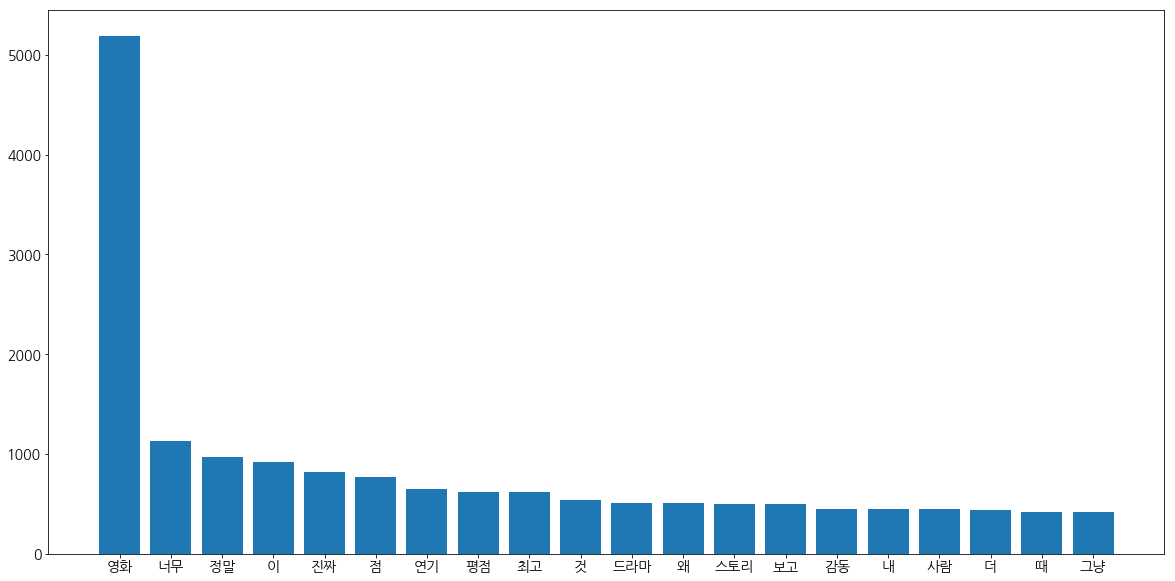

In [58]:
import matplotlib.font_manager
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['font.size'] = 14.

fig, ax = plt.subplots(figsize=(20, 10))

words = zip(*word_count[:20])[0]
counts = zip(*word_count[:20])[1]
x_pos = np.arange(len(words))

plt.bar(x_pos, counts)
plt.xticks(x_pos, words)
plt.show()

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(tokenizer=twitter_tokenizer, min_df=100, stop_words=['것', '듯']).fit(text_train)

In [60]:
print(len(vect.vocabulary_))

133


In [61]:
bag_of_word_tf_idf = tf_idf_vect.transform(text_train)

In [62]:
print(bag_of_word_tf_idf.toarray().sum(axis=0))

[  86.16699302   79.00120299  212.50129007  248.12506028  112.05597513
  218.27913711  134.16548558  241.68458612   68.35597442   95.95236798
   60.96972496   83.73302305  176.85238426  211.8209343    74.19459512
   79.99887891   99.028012    103.04165583  180.99833205  116.47750237
   80.03103039  218.50201238   68.48040349  176.62722391  527.44200282
  104.15335986   68.67046216   86.25564579  108.47524503   65.71363726
  148.09075415   73.15276106  219.98188996   75.33987753  114.74705678
  239.67381306  108.78707611  208.2095781   107.58318128   89.38647935
   99.3718211   161.1691838   192.96657471   80.43008686  130.06688194
   61.23181735   64.08400866   92.38626606   84.45235457  192.70494132
   62.76265048   82.43200197  203.69245692   64.75672498   75.91088831
  125.06744957  226.02584292   87.58761061   64.72997463  159.46305609
  193.31637571   91.02396649  203.15012694  106.740547    143.98168689
   87.31660234   71.13771692  158.95953086   74.68679373  236.46463605
  198.

In [63]:
weighted_score = bag_of_word_tf_idf.toarray().sum(axis=0)

In [65]:
word_count_tf_idf = list(zip(feature_name, weighted_score))

In [66]:
word_count_tf_idf.sort(key=lambda x: x[1], reverse=True)

In [67]:
pprint(word_count_tf_idf)

[(영화, 1783.4946274887704),
 (너무, 527.4420028166095),
 (정말, 470.6662950116839),
 (이, 395.644627908417),
 (진짜, 393.60129903824867),
 (점, 369.79851225357436),
 (최고, 334.39986246340897),
 (평점, 309.97175767898597),
 (연기, 309.33249588618855),
 (왜, 278.026280763401),
 (감동, 248.12506027648115),
 (것, 241.68458611655302),
 (드라마, 239.6738130604603),
 (스토리, 236.46463604969856),
 (보고, 226.02584292307967),
 (재미, 223.78080607478134),
 (더, 219.98188995909635),
 (내, 218.5020123841697),
 (거, 218.27913711345707),
 (감독, 212.50129006666674),
 (그냥, 211.8209343027783),
 (때, 208.20957810338464),
 (배우, 203.692456920742),
 (사람, 203.1501269407179),
 (시간, 198.95405690600177),
 (쓰레기, 196.48615147794078),
 (봐, 193.31637571372437),
 (말, 192.966574711581),
 (뭐, 192.70494131580656),
 (좀, 183.37328779762282),
 (나, 180.99833204604803),
 (그, 176.85238426197566),
 (내용, 176.62722390621252),
 (작품, 166.45174445305912),
 (마지막, 161.16918379549384),
 (완전, 160.0457231975049),
 (볼, 159.46305608952963),
 (수, 158.95953085683067),
 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [69]:
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer = twitter_tokenizer),
                          LogisticRegression())

In [70]:
twit_param_grid = {'tfidfvectorizer__min_df': [5, 7],
#                   'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                   'logisticregression__C': [0.1, 1, 10]}

In [71]:
twit_grid = GridSearchCV(twit_pipe, twit_param_grid, cv=5)

In [72]:
twit_grid.fit(text_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smoo...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__min_df': [5, 7], 'logisticregression__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print(twit_grid.best_score_)
print(twit_grid.best_params_)

0.7476
{'tfidfvectorizer__min_df': 5, 'logisticregression__C': 1}


In [74]:
X_test_konlpy = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)

In [75]:
score = twit_grid.best_estimator_.named_steps['logisticregression'].score(X_test_konlpy, y_test)

In [76]:
print(score)

0.72
